In [7]:

import pandas as pd 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [9]:

def RandomForest(X, Y, A, B):              
    criterions = ['gini', 'entropy', 'log_loss']

    for criterion in criterions:
        param_grid = {
            'n_estimators': [50, 100, 150, 200],
            # Add other hyperparameters you want to tune
            # 'max_depth': [None, 10, 20],
            # 'min_samples_split': [2, 5, 10]
        }

        sc_x = StandardScaler()
        X_scaled = sc_x.fit_transform(X)
        A_scaled = sc_x.transform(A)

        clf = RandomForestClassifier(criterion=criterion, random_state=42)

        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_scaled, Y)

        best_estimator = grid_search.best_estimator_
        best_estimator.fit(X_scaled, Y)

        # Use the same scaler for validation features
        A_scaled = sc_x.transform(A)
        Y_pred = best_estimator.predict(A_scaled)

        best_n_estimators = best_estimator.get_params()['n_estimators']
        print(f"The accuracy of the model is {accuracy_score(B, Y_pred) * 100}%, when using {criterion} of n_estimators as {best_n_estimators}")
        print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
        print(f"Precision: {precision_score(B, Y_pred)}")
        print(f"Recall: {recall_score(B, Y_pred)}")
        print(f"F1-score: {f1_score(B, Y_pred)}")
        print("Classification Report:\n", classification_report(B, Y_pred))

def RANRandomForest(X,Y,A,B):              

    criterions=['gini','entropy','log_loss']

    for  criterion in criterions:
        param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 110, 10)),
    'min_samples_split': [2, 5, 10]
    }

        sc_x=StandardScaler()
        X_scaled=sc_x.fit_transform(X)
        A_scaled=sc_x.transform(A)
        clf=RandomForestClassifier(criterion=criterion,random_state=42)
        clf.fit(X,Y)
        random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
        random_search.fit(X_scaled, Y)
        best_estimator = random_search.best_estimator_
        best_estimator.fit(X_scaled, Y)
        Y_pred = best_estimator.predict(A_scaled)
        best_n_estimators = best_estimator.get_params()['n_estimators']
        print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion} of n_estimators as {best_n_estimators}")
        print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
        print(f"Precision: {precision_score(B, Y_pred)}")
        print(f"Recall: {recall_score(B, Y_pred)}")
        print(f"F1-score: {f1_score(B, Y_pred)}")
        print("Classification Report:\n", classification_report(B, Y_pred))

def SVM(X,Y,A,B):
    criteria=['linear','poly','rbf','sigmoid']
    param_grid = {
        'criterion': criteria,
        'max_depth': [None, 10, 20, 30],
        # Add other hyperparameters as needed
    }
    for criterion in criteria:  
        param_grid['criterion'] = [criterion]

        sc_x=StandardScaler()
        X_scaled=sc_x.fit_transform(X)
        A_scaled=sc_x.transform(A)
        if criterion == 'poly':
            model=SVC(kernel=criterion,degree=3)
            model.fit(X,Y)
            grid_search = GridSearchCV(model, cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_scaled, Y)
            best_estimator = grid_search.best_estimator_
            best_estimator.fit(X_scaled, Y)
            Y_pred = best_estimator.predict(A_scaled)
            print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion} ")
            print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
            print(f"Precision: {precision_score(B, Y_pred)}")
            print(f"Recall: {recall_score(B, Y_pred)}")
            print(f"F1-score: {f1_score(B, Y_pred)}")
            print("Classification Report:\n", classification_report(B, Y_pred))
           

        else:
            model=SVC(kernel=criterion, random_state=42)
            model.fit(X,Y)
            grid_search = GridSearchCV(model,cv=5, scoring='accuracy', n_jobs=-1)       
            grid_search.fit(X_scaled, Y)
            best_estimator = grid_search.best_estimator_
            best_estimator.fit(X_scaled, Y)
            Y_pred = best_estimator.predict(A_scaled)
            print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion}  ")
            print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
            print(f"Precision: {precision_score(B, Y_pred)}")
            print(f"Recall: {recall_score(B, Y_pred)}")
            print(f"F1-score: {f1_score(B, Y_pred)}")
            print("Classification Report:\n", classification_report(B, Y_pred))
         
def evaluate_model(classifier, X, A, Y, B, cv=5):
    # Scale the features
    sc_x = MinMaxScaler()
    X_scaled = sc_x.fit_transform(X)
    A_scaled = sc_x.transform(A)

    # Train the model
    classifier.fit(X_scaled, Y)

    # Make predictions
    y_pred = classifier.predict(A_scaled)

    # Calculate and print metrics
    accuracy = accuracy_score(B, y_pred)
    precision = precision_score(B, y_pred)
    recall = recall_score(B, y_pred)
    f1 = f1_score(B, y_pred)
    roc_auc = roc_auc_score(B, y_pred)
    average_precision = average_precision_score(B, y_pred)
    mcc = matthews_corrcoef(B, y_pred)
    logloss = log_loss(B, y_pred)
    balanced_acc = balanced_accuracy_score(B, y_pred)
    conf_matrix = confusion_matrix(B, y_pred)
    class_report = classification_report(B, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(B, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_scaled, Y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

    def RandomForest(X, Y, A, B):              
    criterions = ['gini', 'entropy', 'log_loss']

    for criterion in criterions:
        param_grid = {
            'n_estimators': [50, 100, 150, 200],
            # Add other hyperparameters you want to tune
            # 'max_depth': [None, 10, 20],
            # 'min_samples_split': [2, 5, 10]
        }

        sc_x = StandardScaler()
        X_scaled = sc_x.fit_transform(X)
        A_scaled = sc_x.transform(A)

        clf = RandomForestClassifier(criterion=criterion, random_state=42)

        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_scaled, Y)

        best_estimator = grid_search.best_estimator_
        best_estimator.fit(X_scaled, Y)

        # Use the same scaler for validation features
        A_scaled = sc_x.transform(A)
        Y_pred = best_estimator.predict(A_scaled)

        best_n_estimators = best_estimator.get_params()['n_estimators']
        print(f"The accuracy of the model is {accuracy_score(B, Y_pred) * 100}%, when using {criterion} of n_estimators as {best_n_estimators}")
        print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
        print(f"Precision: {precision_score(B, Y_pred)}")
        print(f"Recall: {recall_score(B, Y_pred)}")
        print(f"F1-score: {f1_score(B, Y_pred)}")
        print("Classification Report:\n", classification_report(B, Y_pred))

def RANSupportVectorClassifier(X, Y, A, B):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    for kernel in kernels:
        param_dist = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
            'gamma': ['scale', 'auto'] + list(randint(1, 100).rvs(size=5)),  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
            'degree': randint(1, 10),  # Degree of the polynomial kernel function ('poly')
        }

        sc_x = StandardScaler()
        X_scaled = sc_x.fit_transform(X)
        A_scaled = sc_x.transform(A)

        clf = SVC(kernel=kernel, random_state=42)
        random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
        
        # Use the scaled features for training
        random_search.fit(X_scaled, Y)
        
        best_estimator = random_search.best_estimator_
        best_estimator.fit(X_scaled, Y)
        
        Y_pred = best_estimator.predict(A_scaled)
        best_C = best_estimator.get_params()['C']
        best_gamma = best_estimator.get_params()['gamma']
        best_degree = best_estimator.get_params().get('degree', None)
        
        print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {kernel} kernel with C={best_C}, gamma={best_gamma}, and degree={best_degree}")
        print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
        print(f"Precision: {precision_score(B, Y_pred)}")
        print(f"Recall: {recall_score(B, Y_pred)}")
        print(f"F1-score: {f1_score(B, Y_pred)}")
        print("Classification Report:\n", classification_report(B, Y_pred))

def RANLogisticRegression(X, Y, A, B):
    criterions = ['gini']

    for criterion in criterions:
        param_dist = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter for Logistic Regression
        }

        sc_x = StandardScaler()
        X_scaled = sc_x.fit_transform(X)
        A_scaled = sc_x.transform(A)

        clf = LogisticRegression(random_state=42)
        random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
        
        # Use the scaled features for training
        random_search.fit(X_scaled, Y)
        
        best_estimator = random_search.best_estimator_
        best_estimator.fit(X_scaled, Y)
        
        Y_pred = best_estimator.predict(A_scaled)
        best_C = best_estimator.get_params()['C']
        
        print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion} with C={best_C}")
        print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
        print(f"Precision: {precision_score(B, Y_pred)}")
        print(f"Recall: {recall_score(B, Y_pred)}")
        print(f"F1-score: {f1_score(B, Y_pred)}")
        print("Classification Report:\n", classification_report(B, Y_pred))
        
def DecisionTree(X,Y,A,B):
    criterions=['gini','entropy','log_loss']
    param_grid = {
        'criterion': criterions,
        'max_depth': [None, 10, 20, 30],
        # Add other hyperparameters as needed
    }
    for  criterion in criterions:
        param_grid['criterion'] = [criterion]

        sc_x=StandardScaler()
        X_scaled=sc_x.fit_transform(X)
        A_scaled=sc_x.transform(A)
        clf=DecisionTreeClassifier(criterion=criterion,random_state=42)
        clf.fit(X,Y)
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, refit=True)

        grid_search.fit(X_scaled, Y)
        best_estimator = grid_search.best_estimator_
        best_estimator.fit(X_scaled, Y)
        Y_pred = best_estimator.predict(A_scaled)
        print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion} ")
        print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
        print(f"Precision: {precision_score(B, Y_pred)}")
        print(f"Recall: {recall_score(B, Y_pred)}")
        print(f"F1-score: {f1_score(B, Y_pred)}")
        print("Classification Report:\n", classification_report(B, Y_pred))

def NaiveBayes(X,Y,A,B):
 
    sc_x=StandardScaler()
    X_scaled=sc_x.fit_transform(X)
    A_scaled=sc_x.transform(A)
    model=GaussianNB()
    model.fit(X,Y)
    Y_pred = model.predict(A_scaled)
    print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}% ")
    print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
    print(f"Precision: {precision_score(B, Y_pred)}")
    print(f"Recall: {recall_score(B, Y_pred)}")
    print(f"F1-score: {f1_score(B, Y_pred)}")
    print("Classification Report:\n", classification_report(B, Y_pred))
   

def ADARandomForest(X,Y,A,B):

    criteria=['gini','entropy','log_loss']

    for  criterion in criteria:
        param_grid = {
          'n_estimators': [50, 100, 150, 200], 
          'learning_rate':[0.01,0.1,0.5,1.0] 
        }
        sc_x=StandardScaler()
        X_scaled=sc_x.fit_transform(X)
        A_scaled=sc_x.transform(A)
        clf=RandomForestClassifier(criterion=criterion,random_state=42)
        adaboost_RandomForest = AdaBoostClassifier(base_estimator=clf,random_state=42)
        grid_search = GridSearchCV(adaboost_RandomForest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_scaled, Y)
        best_estimator = grid_search.best_estimator_
        best_estimator.fit(X_scaled, Y)
        Y_pred = best_estimator.predict(A_scaled)
        best_n_estimators = best_estimator.get_params()['n_estimators']
        best_learning_rate = best_estimator.get_params()['learning_rate']

        print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion} of n_estimators as {best_n_estimators} and learning_rate as{best_learning_rate}")
        print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
        print(f"Precision: {precision_score(B, Y_pred)}")
        print(f"Recall: {recall_score(B, Y_pred)}")
        print(f"F1-score: {f1_score(B, Y_pred)}")
        print("Classification Report:\n", classification_report(B, Y_pred))

        
def ADASVM(X,Y,A,B):
    criteria=['linear','poly','rbf','sigmoid']
    for criterion in criteria:  
        param_grid = {
          'n_estimators': [50, 100, 150, 200], 
          'learning_rate':[0.01,0.1,0.5,1.0],
          'base_estimator__degree': [2, 3, 4]
        }
        sc_x=StandardScaler()
        X_scaled=sc_x.fit_transform(X)
        A_scaled=sc_x.transform(A)
        if criterion == 'poly':
            model=SVC(kernel=criterion,degree=2)
            adaboost_SVM = AdaBoostClassifier(base_estimator=model,random_state=42)
            adaboost_SVM.fit(X,Y)
            grid_search = GridSearchCV(adaboost_SVM, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_scaled, Y)
            best_estimator = grid_search.best_estimator_
            best_estimator.fit(X_scaled, Y)
            Y_pred = best_estimator.predict(A_scaled)
            best_n_estimators = best_estimator.get_params()['n_estimators']
            best_learning_rate = best_estimator.get_params()['learning_rate']

            print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion} of n_estimators as {best_n_estimators} and learning_rate as{best_learning_rate}")
            print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
            print(f"Precision: {precision_score(B, Y_pred)}")
            print(f"Recall: {recall_score(B, Y_pred)}")
            print(f"F1-score: {f1_score(B, Y_pred)}")
            print("Classification Report:\n", classification_report(B, Y_pred))
            

        else:
            param_grid = {
          'n_estimators': [50, 100, 150, 200], 
          'learning_rate':[0.01,0.1,0.5,1.0] 
        }
            model=SVC(kernel=criterion)
            adaboost_SVM = AdaBoostClassifier(base_estimator=model,random_state=42)
            adaboost_SVM.fit(X,Y)
            grid_search = GridSearchCV(adaboost_SVM, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_scaled, Y)
            best_estimator = grid_search.best_estimator_
            best_estimator.fit(X_scaled, Y)
            Y_pred = best_estimator.predict(A_scaled)
            best_n_estimators = best_estimator.get_params()['n_estimators']
            best_learning_rate = best_estimator.get_params()['learning_rate']
           

            print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion} of n_estimators as {best_n_estimators} and learning_rate as{best_learning_rate}")
            print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
            print(f"Precision: {precision_score(B, Y_pred)}")
            print(f"Recall: {recall_score(B, Y_pred)}")
            print(f"F1-score: {f1_score(B, Y_pred)}")
            print("Classification Report:\n", classification_report(B, Y_pred))


def ADADecisionTree(X,Y,A,B):
    criteria=['gini','entropy','log_loss']
    for  criterion in criteria:
        param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'base_estimator__criterion': ['gini', 'entropy'],
        'base_estimator__max_depth': [None, 5, 10, 15]  # Include different depths here
}

        sc_x=StandardScaler()
        X_scaled=sc_x.fit_transform(X)
        A_scaled=sc_x.transform(A)
        clf=DecisionTreeClassifier(criterion=criterion,random_state=42)
        adaboost_DecisionTree = AdaBoostClassifier(base_estimator=clf,random_state=42)
        adaboost_DecisionTree.fit(X,Y)
        grid_search = GridSearchCV(adaboost_DecisionTree,param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_scaled, Y)
        best_estimator = grid_search.best_estimator_
        best_estimator.fit(X_scaled, Y)
        Y_pred = best_estimator.predict(A_scaled)
        best_n_estimators = best_estimator.get_params()['n_estimators']
        best_learning_rate = best_estimator.get_params()['learning_rate']

        print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when using {criterion} of n_estimators as {best_n_estimators} and learning_rate as{best_learning_rate}")
        print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
        print(f"Precision: {precision_score(B, Y_pred)}")
        print(f"Recall: {recall_score(B, Y_pred)}")
        print(f"F1-score: {f1_score(B, Y_pred)}")
        print("Classification Report:\n", classification_report(B, Y_pred))


def ADANaiveBayes(X,Y,A,B):
    param_grid = {
          'n_estimators': [50, 100, 150, 200], 
          'learning_rate':[0.01,0.1,0.5,1.0] 
        }
    sc_x=StandardScaler()
    X_scaled=sc_x.fit_transform(X)
    A_scaled=sc_x.transform(A)
    model=GaussianNB()
    adaboost_Naivebaise = AdaBoostClassifier(base_estimator=model, random_state=42)
    adaboost_Naivebaise.fit(X,Y)
    grid_search = GridSearchCV(adaboost_Naivebaise,param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_scaled, Y)
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_scaled, Y)
    Y_pred = best_estimator.predict(A_scaled)
    best_n_estimators = best_estimator.get_params()['n_estimators']
    best_learning_rate = best_estimator.get_params()['learning_rate']
    print(f"The accuracy of the model is {accuracy_score(B, Y_pred)*100}%, when n_estimators as {best_n_estimators} and learning_rate as{best_learning_rate}")
    print("Confusion Matrix:\n", confusion_matrix(B, Y_pred))
    print(f"Precision: {precision_score(B, Y_pred)}")
    print(f"Recall: {recall_score(B, Y_pred)}")
    print(f"F1-score: {f1_score(B, Y_pred)}")
    print("Classification Report:\n", classification_report(B, Y_pred))
  
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    matthews_corrcoef,
    log_loss,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Add MinMaxScaler

def evaluate_model(classifier, X, A, Y, B, cv=5):
    sc_x = MinMaxScaler()
    X_scaled = sc_x.fit_transform(X)
    A_scaled = sc_x.transform(A)
    classifier.fit(X_scaled, Y)

    
    y_pred = classifier.predict(A_scaled)
    accuracy = accuracy_score(B, y_pred)
    precision = precision_score(B, y_pred)
    recall = recall_score(B, y_pred)
    f1 = f1_score(B, y_pred)
    roc_auc = roc_auc_score(B, y_pred)
    average_precision = average_precision_score(B, y_pred)
    mcc = matthews_corrcoef(B, y_pred)
    logloss = log_loss(B, y_pred)
    balanced_acc = balanced_accuracy_score(B, y_pred)
    conf_matrix = confusion_matrix(B, y_pred)
    class_report = classification_report(B, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    fpr, tpr, thresholds = roc_curve(B, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_scaled, Y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

# Example usage:
# evaluate_model(MultinomialNB(), X_train, X_test, y_train, y_test)

def evaluate_model(classifier, X, A, Y, B, cv=5):
    # Scale the features
    sc_x = MinMaxScaler()
    X_scaled = sc_x.fit_transform(X)
    A_scaled = sc_x.transform(A)

    # Train the model
    classifier.fit(X_scaled, Y)

    # Make predictions
    y_pred = classifier.predict(A_scaled)

    # Calculate and print metrics
    accuracy = accuracy_score(B, y_pred)
    precision = precision_score(B, y_pred)
    recall = recall_score(B, y_pred)
    f1 = f1_score(B, y_pred)
    roc_auc = roc_auc_score(B, y_pred)
    average_precision = average_precision_score(B, y_pred)
    mcc = matthews_corrcoef(B, y_pred)
    logloss = log_loss(B, y_pred)
    balanced_acc = balanced_accuracy_score(B, y_pred)
    conf_matrix = confusion_matrix(B, y_pred)
    class_report = classification_report(B, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(B, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_scaled, Y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()


In [8]:
df=pd.read_csv('trainset.csv')
dt=pd.read_csv('testset.csv')

In [9]:
df.isnull().sum()
df.fillna(0,inplace=True)
dt.isnull().sum()
dt.fillna(0,inplace=True)
X = df.loc[:,df.columns[1:]].values
Y = df.loc[:,df.columns[0]].values
A = dt.loc[:,dt.columns[1:]].values
B = dt.loc[:,dt.columns[0]].values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_val_scaled = scaler.transform(A)

In [10]:
df

cls  ABC  ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A     SpAD_A  \
0       1  0.0    0.0      0      0  25.001104  2.501652  4.923679  25.001104   
1       1  0.0    0.0      0      0  20.274271  2.409184  4.779725  20.274271   
2       1  0.0    0.0      0      0  23.679070  2.528665  4.931112  23.679070   
3       1  0.0    0.0      0      0  27.774585  2.557762  4.967131  27.774585   
4       1  0.0    0.0      0      0  39.613943  2.477563  4.835703  39.613943   
...   ...  ...    ...    ...    ...        ...       ...       ...        ...   
7995    0  0.0    0.0      0      1  25.162228  2.444418  4.888835  25.162228   
7996    0  0.0    0.0      0      0  25.266178  2.534987  4.934272  25.266178   
7997    0  0.0    0.0      2      0  23.921252  2.296174  4.541085  23.921252   
7998    0  0.0    0.0      0      0  35.341681  2.541818  5.014881  35.341681   
7999    0  0.0    0.0      0      0  31.179816  2.416831  4.706367  31.179816   

       SpMAD_A  ...      SRW10     TSRW10          MW       AMW  WPath  WPol  \
0     1.250055  ...   9.918524  67.526731  284.075684  8.877365    764    32   
1     1.267142  ...   9.636588  61.986524  226.038985  9.827782    429    23   
2     1.392886  ...  10.022647  65.026165  223.074562  8.579791    461    29   
3     1.388729  ...  10.250228  70.773493  266.069142  8.868971    735    35   
4     1.320465  ...  10.233043  79.537169  415.183067  7.548783   2674    45   
...        ...  ...        ...        ...         ...       ...    ...   ...   
7995  1.324328  ...   9.911108  52.566001  259.120843  7.197801    688    30   
7996  1.203151  ...  10.024155  69.315801  328.076075  8.633581    904    34   
7997  1.259013  ...   9.488048  65.073826  278.094980  8.427121    813    23   
7998  1.359295  ...  10.356186  75.559148  352.169939  7.492977   1547    44   
7999  1.299159  ...   9.878324  73.901759  361.077950  9.258409   1515    32   

      Zagreb1  Zagreb2  mZagreb1  mZagreb2  
0         100      119  7.777778  4.666667  
1          82       96  6.166667  3.583333  
2          98      121  3.416667  3.638889  
3         120      150  3.888889  4.166667  
4         156      182  8.500000  6.694444  
...       ...      ...       ...       ...  
7995      100      118  5.416667  4.194444  
7996      108      128  9.250000  4.611111  
7997       92      103  6.305556  4.361111  
7998      146      177  6.000000  5.583333  
7999      122      141  7.277778  5.416667  

[8000 rows x 1614 columns]

In [20]:
p=df.hist(figsize=(100,100))#rahul work ,i just changed the inside numbers to make it visible

THIS MODEL IS CREATED BY NEURAL NETWORK

In [11]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(1613,)),
keras.layers.Dense(256,activation='relu'),
BatchNormalization(),
keras.layers.Dropout(0.5),
keras.layers.Dense(128,activation='relu'),
BatchNormalization(),
keras.layers.Dropout(0.5),
keras.layers.Dense(64,activation='relu'),
BatchNormalization(),
keras.layers.Dropout(0.5),
keras.layers.Dense(1, activation='sigmoid') 
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled,Y,epochs=15,validation_data=(X_val_scaled,B))





Epoch 1/15
250/250 [==============================] - 1s 2ms/step - loss: 0.5419 - accuracy: 0.7592 - val_loss: 0.5254 - val_accuracy: 0.7385
Epoch 2/15
250/250 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8089 - val_loss: 0.4821 - val_accuracy: 0.7615
Epoch 3/15
250/250 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8397 - val_loss: 0.4910 - val_accuracy: 0.7535
Epoch 4/15
250/250 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8551 - val_loss: 0.5071 - val_accuracy: 0.7565
Epoch 5/15
250/250 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8568 - val_loss: 0.4818 - val_accuracy: 0.7690
Epoch 6/15
250/250 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8668 - val_loss: 0.4718 - val_accuracy: 0.7775
Epoch 7/15
250/250 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8695 - val_loss: 0.4608 - val_accuracy: 0.7740
Epoch 

In [12]:
model.evaluate(X_val_scaled,B)

63/63 [==============================] - 0s 938us/step - loss: 0.4738 - accuracy: 0.7710


[0.4737856388092041, 0.7710000276565552]

In [16]:
y_predicted=model.predict(X_val_scaled)

63/63 [==============================] - 0s 2ms/step


In [17]:

# Assuming 'Y_test' is the true labels of the test set
y_pred_binary = (y_predicted > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(B, y_pred_binary)
precision = precision_score(B, y_pred_binary)
recall = recall_score(B, y_pred_binary)
f1 = f1_score(B, y_pred_binary)
cm = confusion_matrix(B, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.7955
Precision: 0.8924
Recall: 0.6720
F1 Score: 0.7667
Confusion Matrix:
[[919  81]
 [328 672]]


Text(95.72222222222221, 0.5, 'Truth')

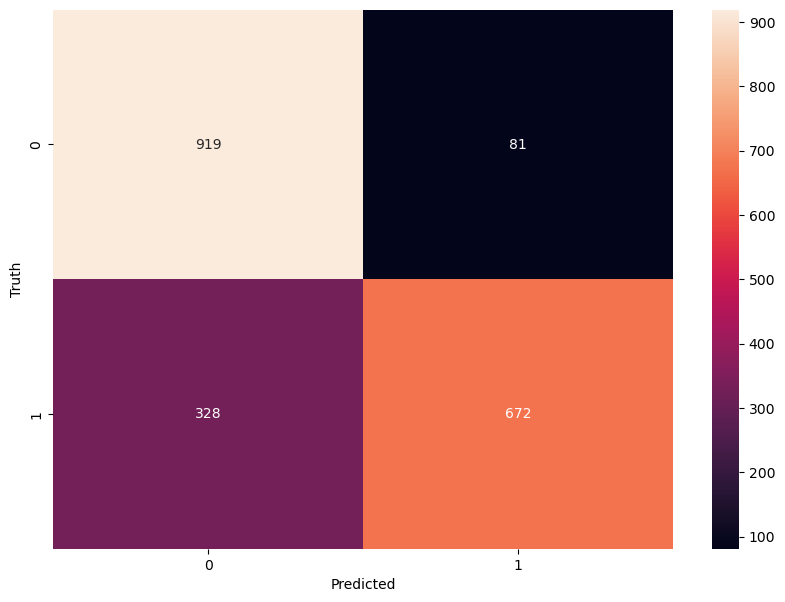

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

63/63 [==============================] - 0s 2ms/step


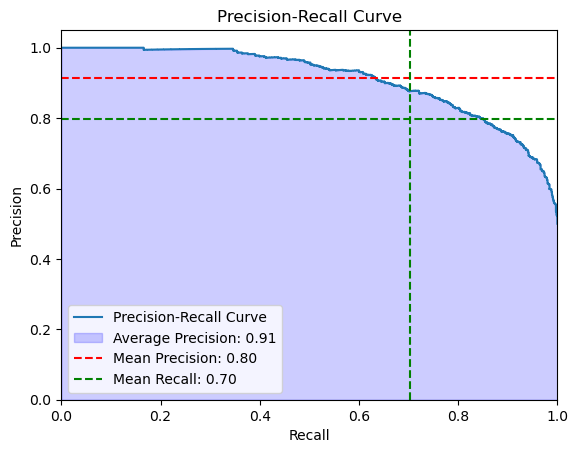

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have a Keras Sequential model named 'model' and a validation dataset 'X_val_scaled'
# Replace X_val_scaled with your actual validation dataset
y_scores = model.predict(X_val_scaled)  # Predict probabilities

# Assuming 'B' is your ground truth labels for the validation set
# Compute precision and recall
precision, recall, _ = precision_recall_curve(B, y_scores)

# Compute average precision
average_precision = average_precision_score(B, y_scores)

# Plot precision-recall curve
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.axhline(y=average_precision, color='r', linestyle='--')
plt.axhline(y=np.mean(precision), color='g', linestyle='--')
plt.axvline(x=np.mean(recall), color='g', linestyle='--')
plt.legend(['Precision-Recall Curve', f'Average Precision: {average_precision:.2f}', f'Mean Precision: {np.mean(precision):.2f}', f'Mean Recall: {np.mean(recall):.2f}'], loc='lower left')
plt.show()




JUST CHECKING IF THE CLASSES ARE BALANCED OR IMBALANCE

In [90]:
df

cls  ABC  ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A     SpAD_A  \
0       1  0.0    0.0      0      0  25.001104  2.501652  4.923679  25.001104   
1       1  0.0    0.0      0      0  20.274271  2.409184  4.779725  20.274271   
2       1  0.0    0.0      0      0  23.679070  2.528665  4.931112  23.679070   
3       1  0.0    0.0      0      0  27.774585  2.557762  4.967131  27.774585   
4       1  0.0    0.0      0      0  39.613943  2.477563  4.835703  39.613943   
...   ...  ...    ...    ...    ...        ...       ...       ...        ...   
7995    0  0.0    0.0      0      1  25.162228  2.444418  4.888835  25.162228   
7996    0  0.0    0.0      0      0  25.266178  2.534987  4.934272  25.266178   
7997    0  0.0    0.0      2      0  23.921252  2.296174  4.541085  23.921252   
7998    0  0.0    0.0      0      0  35.341681  2.541818  5.014881  35.341681   
7999    0  0.0    0.0      0      0  31.179816  2.416831  4.706367  31.179816   

       SpMAD_A  ...      SRW10     TSRW10          MW       AMW  WPath  WPol  \
0     1.250055  ...   9.918524  67.526731  284.075684  8.877365    764    32   
1     1.267142  ...   9.636588  61.986524  226.038985  9.827782    429    23   
2     1.392886  ...  10.022647  65.026165  223.074562  8.579791    461    29   
3     1.388729  ...  10.250228  70.773493  266.069142  8.868971    735    35   
4     1.320465  ...  10.233043  79.537169  415.183067  7.548783   2674    45   
...        ...  ...        ...        ...         ...       ...    ...   ...   
7995  1.324328  ...   9.911108  52.566001  259.120843  7.197801    688    30   
7996  1.203151  ...  10.024155  69.315801  328.076075  8.633581    904    34   
7997  1.259013  ...   9.488048  65.073826  278.094980  8.427121    813    23   
7998  1.359295  ...  10.356186  75.559148  352.169939  7.492977   1547    44   
7999  1.299159  ...   9.878324  73.901759  361.077950  9.258409   1515    32   

      Zagreb1  Zagreb2  mZagreb1  mZagreb2  
0         100      119  7.777778  4.666667  
1          82       96  6.166667  3.583333  
2          98      121  3.416667  3.638889  
3         120      150  3.888889  4.166667  
4         156      182  8.500000  6.694444  
...       ...      ...       ...       ...  
7995      100      118  5.416667  4.194444  
7996      108      128  9.250000  4.611111  
7997       92      103  6.305556  4.361111  
7998      146      177  6.000000  5.583333  
7999      122      141  7.277778  5.416667  

[8000 rows x 1614 columns]

In [91]:
print(df['cls'].value_counts())


cls
1    4000
0    4000
Name: count, dtype: int64


In [92]:
print(df.isnull().any().any())


False


THIS MODEL WAS CREATED USING CNN

In [27]:

model_1 = Sequential()

model_1.add(Conv1D(32, 3, activation='relu', input_shape=(1613, 1)))

model_1.add(MaxPooling1D(2))

model_1.add(Conv1D(64, 3, activation='relu'))

model_1.add(MaxPooling1D(2))

model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))


model_1.add(Dropout(0.5))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1611, 32)          128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 805, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 803, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 401, 64)           0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 25664)             0         
                                                                 
 dense_8 (Dense)             (None, 128)             

In [28]:
model_1.fit(X_train_scaled,Y,epochs=10,validation_data=(X_val_scaled,B))

Epoch 1/10
250/250 [==============================] - 11s 41ms/step - loss: 0.4204 - accuracy: 0.8156 - val_loss: 0.5141 - val_accuracy: 0.7360
Epoch 2/10
250/250 [==============================] - 10s 42ms/step - loss: 0.3126 - accuracy: 0.8701 - val_loss: 0.4271 - val_accuracy: 0.7875
Epoch 3/10
250/250 [==============================] - 10s 42ms/step - loss: 0.2766 - accuracy: 0.8867 - val_loss: 0.4677 - val_accuracy: 0.7830
Epoch 4/10
250/250 [==============================] - 10s 41ms/step - loss: 0.2479 - accuracy: 0.8989 - val_loss: 0.4718 - val_accuracy: 0.7840
Epoch 5/10
250/250 [==============================] - 10s 41ms/step - loss: 0.2165 - accuracy: 0.9126 - val_loss: 0.4589 - val_accuracy: 0.7855
Epoch 6/10
250/250 [==============================] - 10s 41ms/step - loss: 0.1899 - accuracy: 0.9265 - val_loss: 0.4849 - val_accuracy: 0.7835
Epoch 7/10
250/250 [==============================] - 11s 44ms/step - loss: 0.1663 - accuracy: 0.9358 - val_loss: 0.4782 - val_accuracy:

In [29]:
model_1.evaluate(X_val_scaled,B)

63/63 [==============================] - 1s 9ms/step - loss: 0.5692 - accuracy: 0.7875


[0.5692271590232849, 0.7875000238418579]

In [30]:
y_predicted_1=model_1.predict(X_val_scaled)

63/63 [==============================] - 1s 8ms/step


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'Y_test' is the true labels of the test set
y_pred_binary = (y_predicted_1 > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(B, y_pred_binary)
precision = precision_score(B, y_pred_binary)
recall = recall_score(B, y_pred_binary)
f1 = f1_score(B, y_pred_binary)
cm = confusion_matrix(B, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7875
Precision: 0.9032
Recall: 0.6440
F1 Score: 0.7519
Confusion Matrix:
[[931  69]
 [356 644]]


Text(95.72222222222221, 0.5, 'Truth')

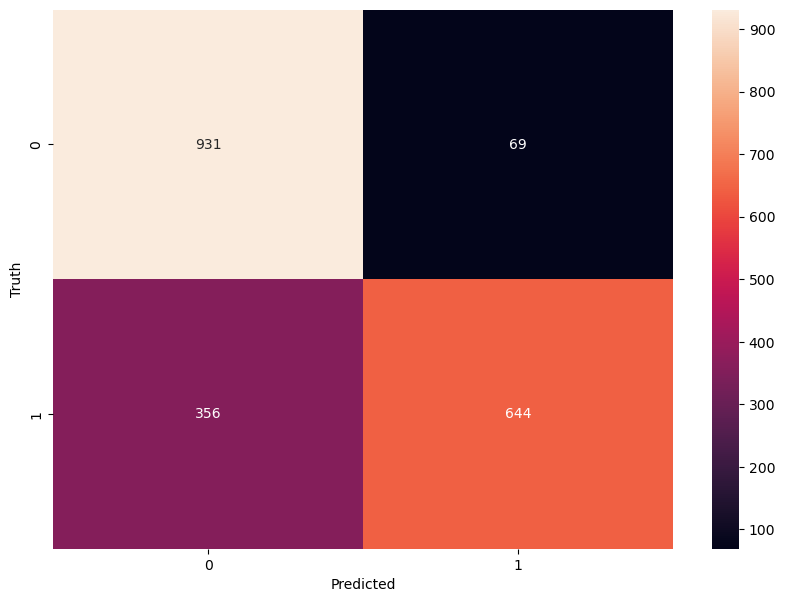

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

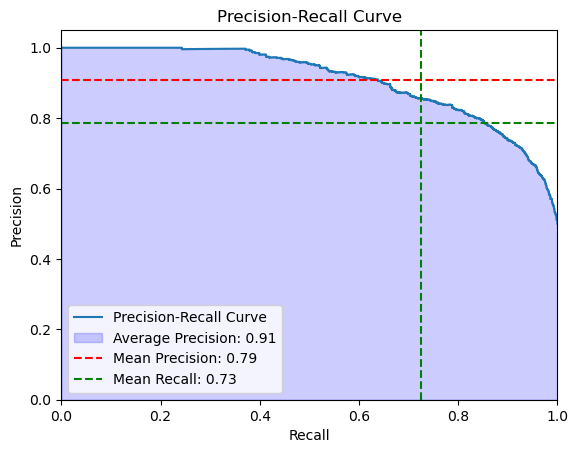

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision and recall
precision, recall, _ = precision_recall_curve(B, y_predicted_1)

# Compute average precision
average_precision = average_precision_score(B, y_predicted_1)

# Plot precision-recall curve
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.axhline(y=average_precision, color='r', linestyle='--')
plt.axhline(y=np.mean(precision), color='g', linestyle='--')
plt.axvline(x=np.mean(recall), color='g', linestyle='--')
plt.legend(['Precision-Recall Curve', f'Average Precision: {average_precision:.2f}', f'Mean Precision: {np.mean(precision):.2f}', f'Mean Recall: {np.mean(recall):.2f}'], loc='lower left')
plt.show()


THIS MODEL WAS CREATED USING RANDOM FOREST

In [243]:
RandomForest(X,Y,A,B)

The accuracy of the model is 75.4%, when using gini of n_estimators as 200
Confusion Matrix:
 [[894 106]
 [386 614]]
Precision: 0.8527777777777777
Recall: 0.614
F1-score: 0.713953488372093
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78      1000
           1       0.85      0.61      0.71      1000

    accuracy                           0.75      2000
   macro avg       0.78      0.75      0.75      2000
weighted avg       0.78      0.75      0.75      2000



KeyboardInterrupt: 

THIS MODEL WAS CREATED USING LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression


Accuracy: 0.7875
Precision: 0.87001287001287
Recall: 0.676
F1-Score: 0.7608328643781654
AUC-ROC: 0.7875000000000001
AUC-PR (Average Precision): 0.7501287001287
Matthew's Correlation Coefficient (MCC): 0.5898534267224275
Log Loss: 7.659276345187394
Balanced Accuracy: 0.7875000000000001
Confusion Matrix:
[[899 101]
 [324 676]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1000
           1       0.87      0.68      0.76      1000

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.78      2000
weighted avg       0.80      0.79      0.78      2000



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


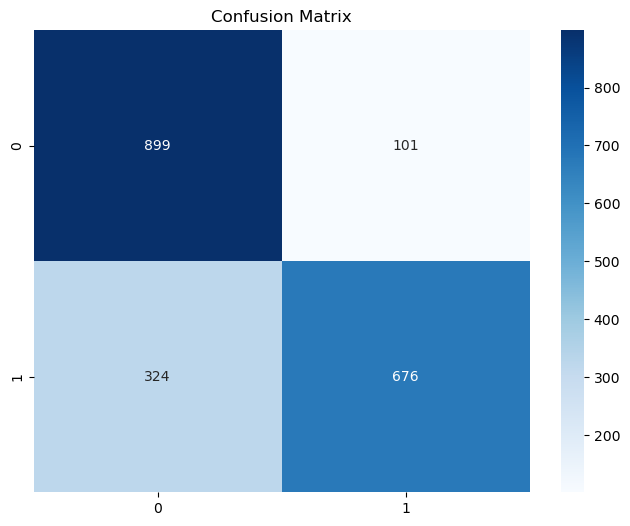

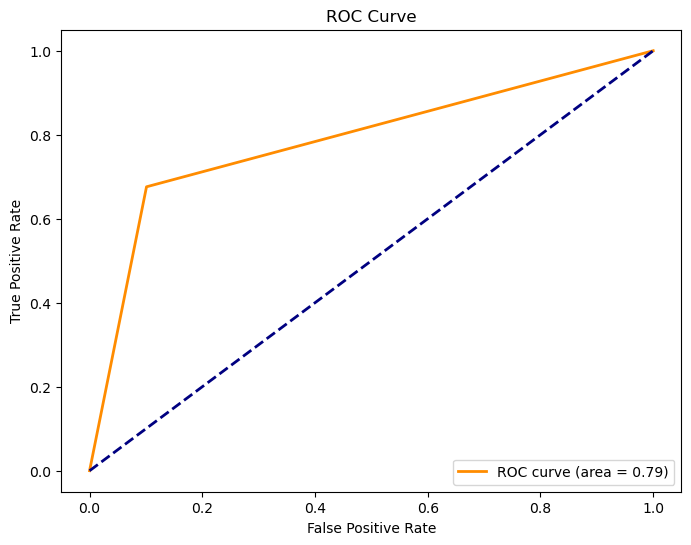

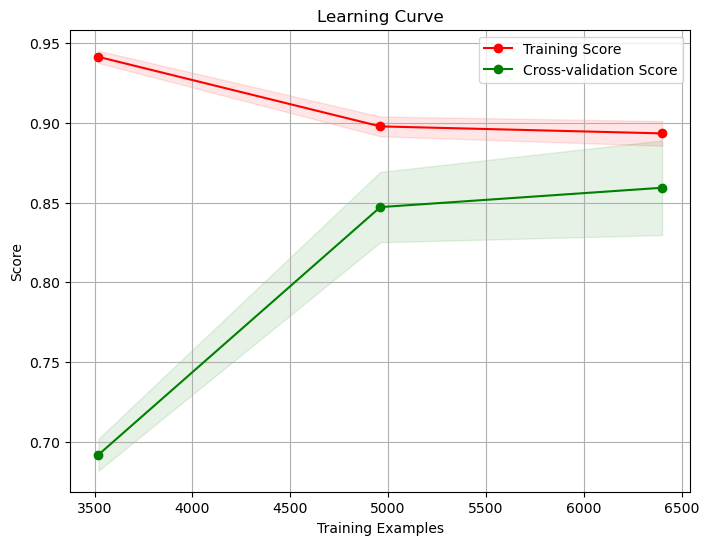

In [251]:
evaluate_model(LogisticRegression(),X,A,Y,B)

Accuracy: 0.786
Precision: 0.8657289002557544
Recall: 0.677
F1-Score: 0.7598204264870931
AUC-ROC: 0.786
AUC-PR (Average Precision): 0.7475984654731458
Matthew's Correlation Coefficient (MCC): 0.5860963383352625
Log Loss: 7.713341825271071
Balanced Accuracy: 0.786
Confusion Matrix:
[[895 105]
 [323 677]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1000
           1       0.87      0.68      0.76      1000

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.78      2000
weighted avg       0.80      0.79      0.78      2000



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


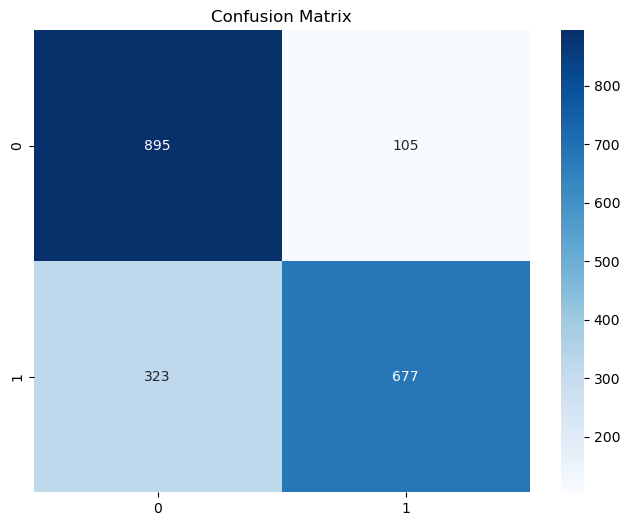

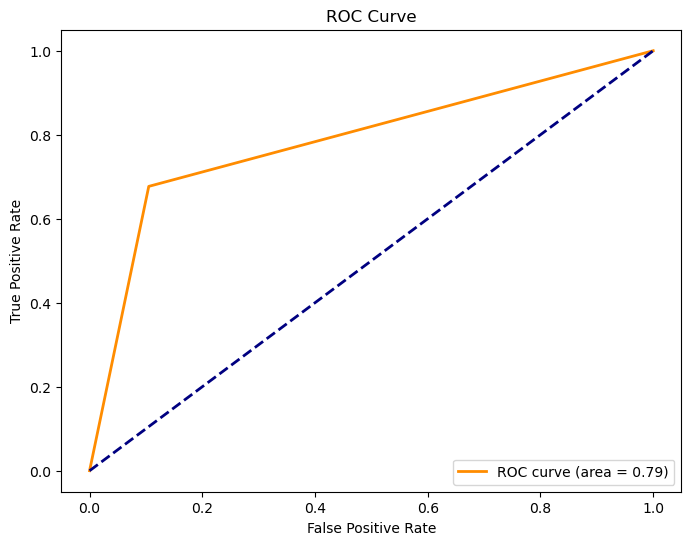

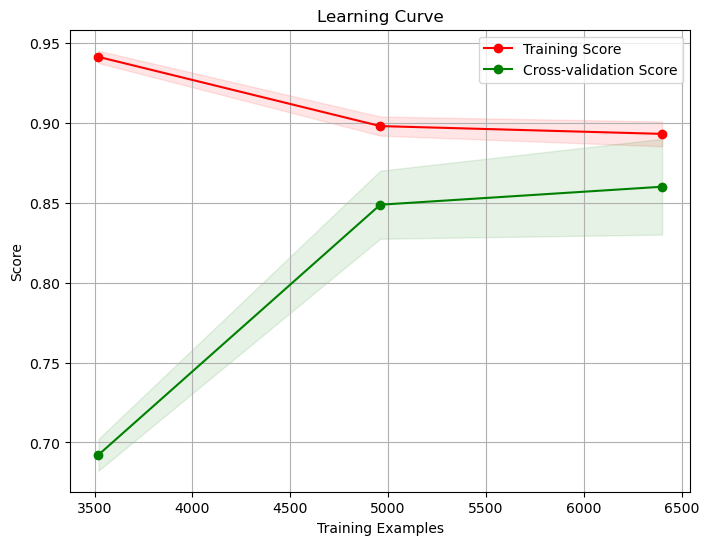

In [252]:
evaluate_model(LogisticRegression(),X_train_scaled,X_val_scaled,Y,B)

THIS MODEL WAS CREATED USING SVM 

Accuracy: 0.758
Precision: 0.8816568047337278
Recall: 0.596
F1-Score: 0.7112171837708829
AUC-ROC: 0.758
AUC-PR (Average Precision): 0.7274674556213017
Matthew's Correlation Coefficient (MCC): 0.5454216352375488
Log Loss: 8.722564120166352
Balanced Accuracy: 0.758
Confusion Matrix:
[[920  80]
 [404 596]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      1000
           1       0.88      0.60      0.71      1000

    accuracy                           0.76      2000
   macro avg       0.79      0.76      0.75      2000
weighted avg       0.79      0.76      0.75      2000



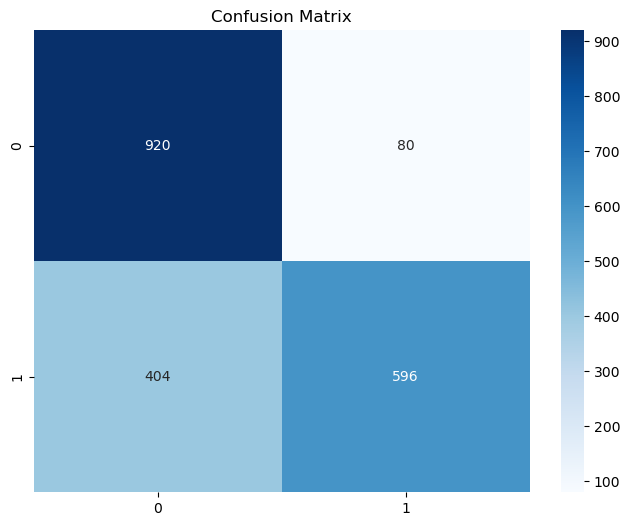

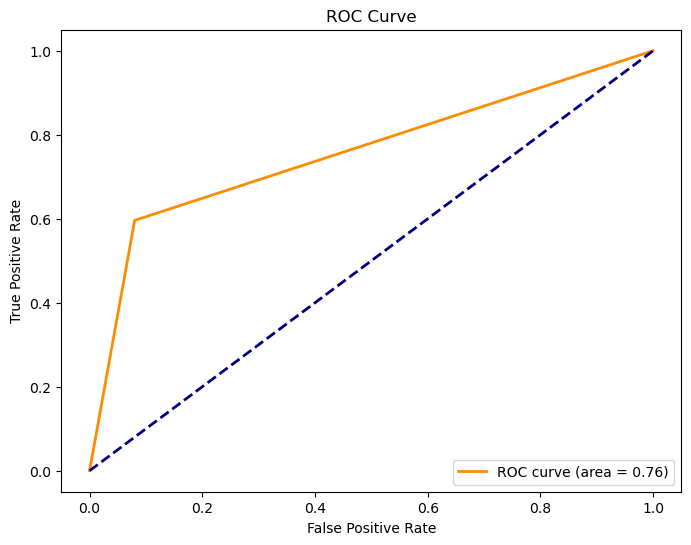

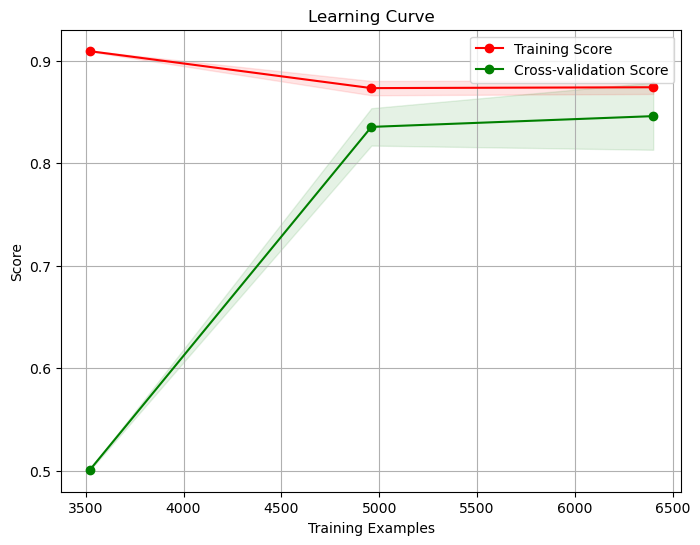

In [254]:
evaluate_model(SVC(),X,A,Y,B)

Accuracy: 0.758
Precision: 0.8816568047337278
Recall: 0.596
F1-Score: 0.7112171837708829
AUC-ROC: 0.758
AUC-PR (Average Precision): 0.7274674556213017
Matthew's Correlation Coefficient (MCC): 0.5454216352375488
Log Loss: 8.722564120166352
Balanced Accuracy: 0.758
Confusion Matrix:
[[920  80]
 [404 596]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      1000
           1       0.88      0.60      0.71      1000

    accuracy                           0.76      2000
   macro avg       0.79      0.76      0.75      2000
weighted avg       0.79      0.76      0.75      2000



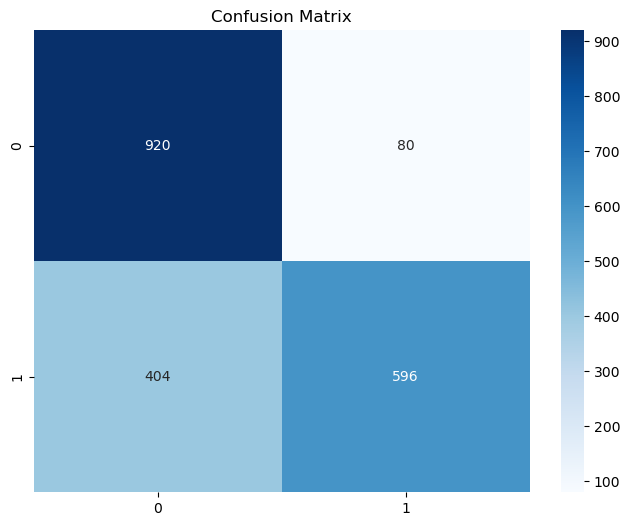

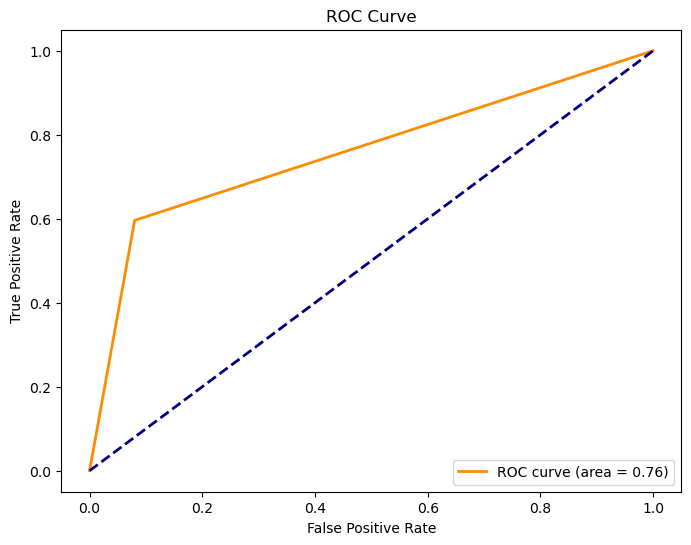

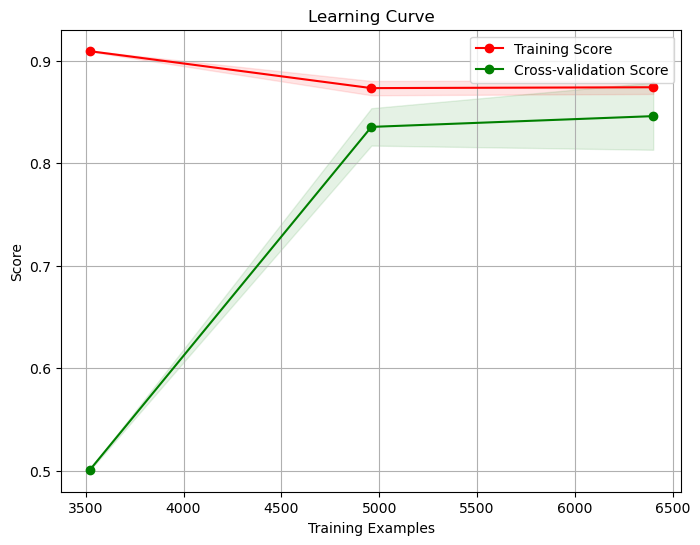

In [255]:
evaluate_model(SVC(),X_train_scaled,X_val_scaled,Y,B)

In [ ]:
THIS MODEL WAS CREATED USING RANDOM FOREST WITH HYPERPARAMETER

In [262]:
RANRandomForest(X,Y,A,B)

The accuracy of the model is 75.4%, when using gini of n_estimators as 188
Confusion Matrix:
 [[893 107]
 [385 615]]
Precision: 0.8518005540166205
Recall: 0.615
F1-score: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78      1000
           1       0.85      0.61      0.71      1000

    accuracy                           0.75      2000
   macro avg       0.78      0.75      0.75      2000
weighted avg       0.78      0.75      0.75      2000

The accuracy of the model is 75.1%, when using entropy of n_estimators as 194
Confusion Matrix:
 [[905  95]
 [403 597]]
Precision: 0.8627167630057804
Recall: 0.597
F1-score: 0.7056737588652483
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78      1000
           1       0.86      0.60      0.71      1000

    accuracy                           0.75      2000
   macro avg       0.78 

In [14]:
RANLogisticRegression(X,Y,A,B)
#MY CODE WITH INCREASED ITERATIONS ARE UNFORTUNATLY DELETED , I RAN IT ,BUT IT SHOULD THE SAME KINDA THE RESULT

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model is 79.2%, when using gini with C=0.1
Confusion Matrix:
 [[905  95]
 [321 679]]
Precision: 0.8772609819121447
Recall: 0.679
F1-score: 0.7655016910935738
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.81      1000
           1       0.88      0.68      0.77      1000

    accuracy                           0.79      2000
   macro avg       0.81      0.79      0.79      2000
weighted avg       0.81      0.79      0.79      2000



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
